In [2]:
pip install tensorflow

You should consider upgrading via the 'C:\Users\new\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



  Using cached tensorflow-2.10.0-cp310-cp310-win_amd64.whl (455.9 MB)
     ------------------------------------- 124.6/124.6 KB 95.0 kB/s eta 0:00:00
     ------------------------------------ 438.7/438.7 KB 261.1 kB/s eta 0:00:00
     ------------------------------------ 895.7/895.7 KB 211.4 kB/s eta 0:00:00
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
     ---------------------------------------- 2.6/2.6 MB 189.1 kB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 3.6/3.6 MB 371.2 kB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     -------------------------------------- 14.2/14.2 MB 222.1 kB/s eta 0:00:00
  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
     ---------------------------------------- 5.9/5.9 MB 70.8 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 67.0 kB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-an

In [2]:
pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.5/7.5 MB 652.0 kB/s eta 0:00:00
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
     ------------------------------------ 298.0/298.0 KB 428.8 kB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=8d1d1d5e550c6f1ffad07c5663860a61c3530819e5685d56bc9a3637f81d86b1
  Stored in directory: c:\users\new\appdata\local\pip\cache\wheels\9b\13\01\6f3a7fd641f90e1f6c8c7cded057f3394f451f340371c68f3d
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\new\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
data = []
labels = []
classes = 43
cur_path = os.getcwd()
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [4]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [5]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 69s 70ms/step - loss: 2.0276 - accuracy: 0.4780 - val_loss: 0.5175 - val_accuracy: 0.8660
Epoch 2/15
981/981 [==============================] - 65s 66ms/step - loss: 0.7237 - accuracy: 0.7864 - val_loss: 0.2445 - val_accuracy: 0.9257
Epoch 3/15
981/981 [==============================] - 62s 63ms/step - loss: 0.5067 - accuracy: 0.8518 - val_loss: 0.2421 - val_accuracy: 0.9422
Epoch 4/15
981/981 [==============================] - 70s 71ms/step - loss: 0.4177 - accuracy: 0.8785 - val_loss: 0.1447 - val_accuracy: 0.9588
Epoch 5/15
981/981 [==============================] - 64s 65ms/step - loss: 0.3779 - accuracy: 0.8882 - val_loss: 0.1316 - val_accuracy: 0.9615
Epoch 6/15
981/981 [==============================] - 67s 69ms/step - loss: 0.3612 - accuracy: 0.8930 - val_loss: 0.1183 - val_accuracy: 0.9671
Epoch 7/15
981/981 [==============================] - 64s 66ms/step - loss: 0.3205 - accuracy: 0.9053 - val_loss: 0.1167 - val_accuracy:

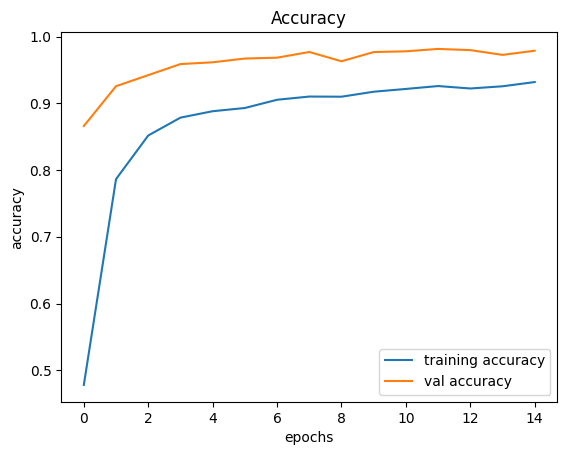

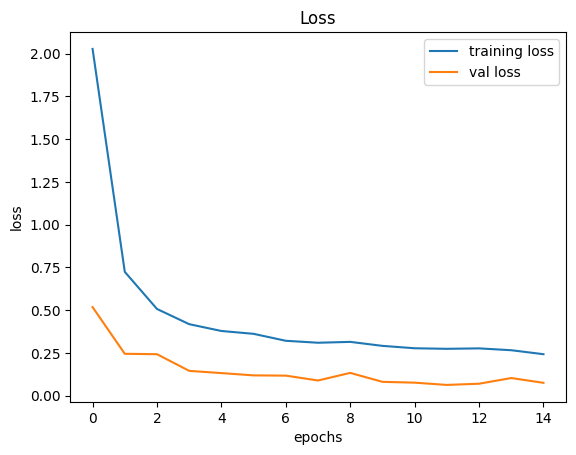

In [7]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = (model.predict(X_test) > 0.5).astype("int32")
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

395/395 [==============================] - 4s 9ms/step


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [18]:
model.save('traffic_classifier.h5')